In [140]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('ggplot')

# Importing data and slicing
creates an array "data" that contain 5 arrays corresponding to the 5 datasets

In [98]:
raw_data = np.loadtxt("FranksNumbers.txt", skiprows=2, dtype='str', usecols=(0,1))
temp = []
for x in raw_data:
    if any(x == "Data"):
        continue
    temp.append([float(k) for k in x])
data_1 = np.array(data[:11])
data = [[temp[:11], temp[11:22], temp[22:33], temp[33:44], temp[44:]]]
data = [np.array(data[0][i]) for i in range(5)]

# Visualizing data - initial look

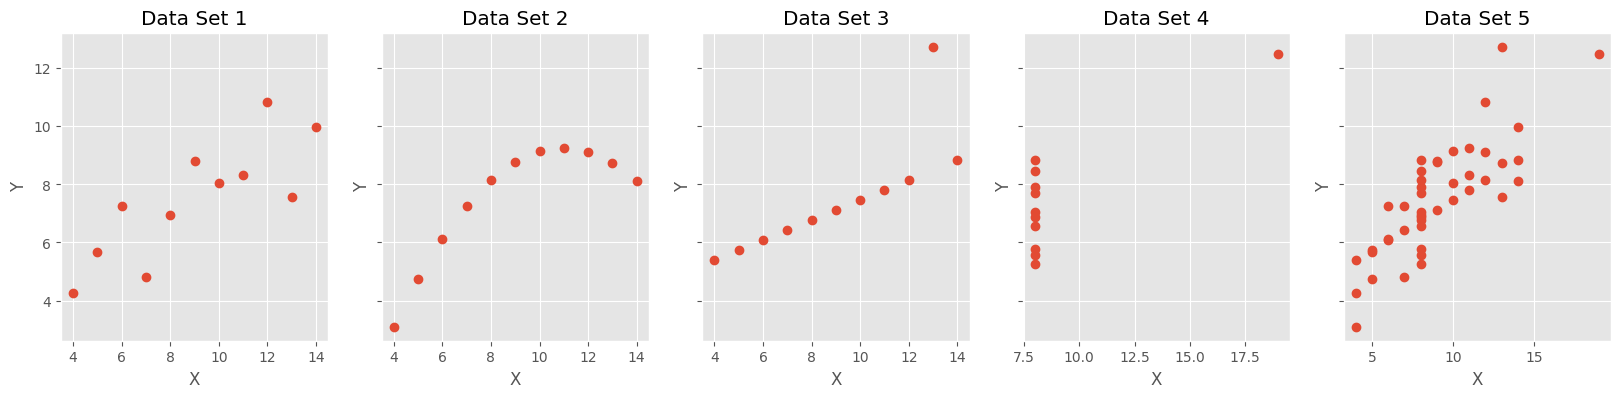

In [141]:
fig, ax = plt.subplots(1,5, figsize=(20,4), sharey=True)
for x in range(5):
    ax[x].plot(data[x][:,0], data[x][:,1], 'o')
    ax[x].set_title(f"Data Set {x+1}")
    ax[x].set_xlabel("X")
    ax[x].set_ylabel("Y")

fig.sharey = True

# Part 1. Finding mean and variance
It seems all of the datasets has approximately the same mean and variance

In [142]:
for x in range(5):
    x_array, y_array = data[x][:,0], data[x][:,1]
    mean = np.mean(y_array)
    std = np.std(y_array)
    print(f"Data Set {x+1}:")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Standard Deviation of the Mean: {std/np.sqrt(len(y_array))}")
    print()

Data Set 1:
Mean: 7.500909090909093
Standard Deviation: 1.937024215108669
Standard Deviation of the Mean: 0.584034775577102

Data Set 2:
Mean: 7.50090909090909
Standard Deviation: 1.93710869148962
Standard Deviation of the Mean: 0.5840602461643076

Data Set 3:
Mean: 7.5
Standard Deviation: 1.9359329439927313
Standard Deviation of the Mean: 0.5837057449556368

Data Set 4:
Mean: 7.500909090909091
Standard Deviation: 1.9360806451340837
Standard Deviation of the Mean: 0.5837502785253617

Data Set 5:
Mean: 7.5006818181818184
Standard Deviation: 1.9365367373545919
Standard Deviation of the Mean: 0.29194389775200924



# Part 2 
Here we create a class for performing all our needed calculations. It seems picking the largest uncertainty gives us the lowest chi-square. 

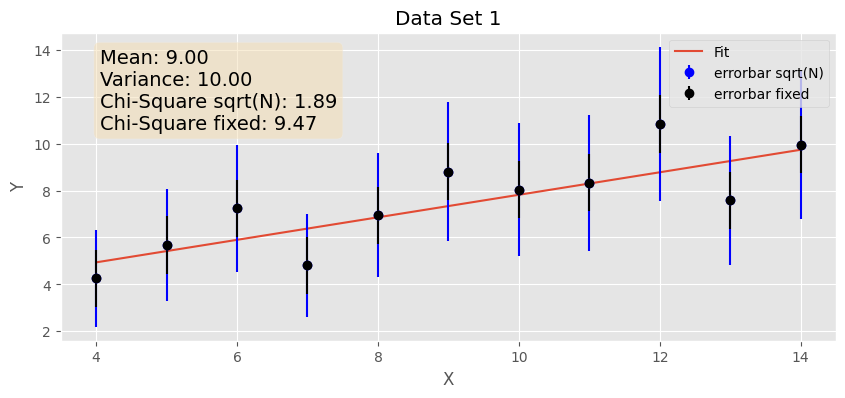

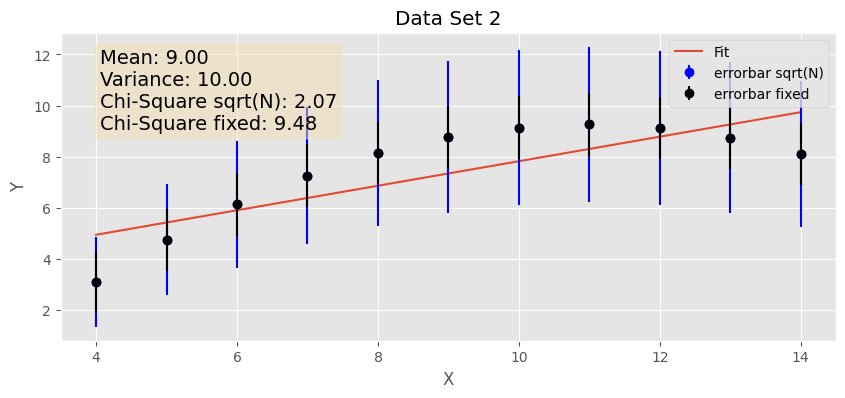

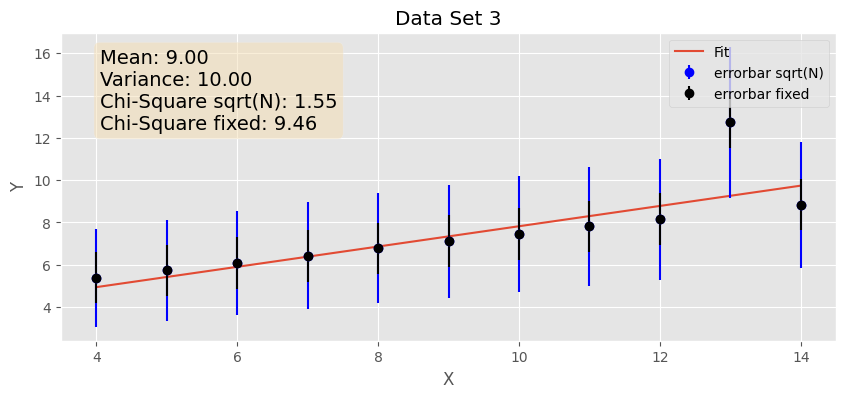

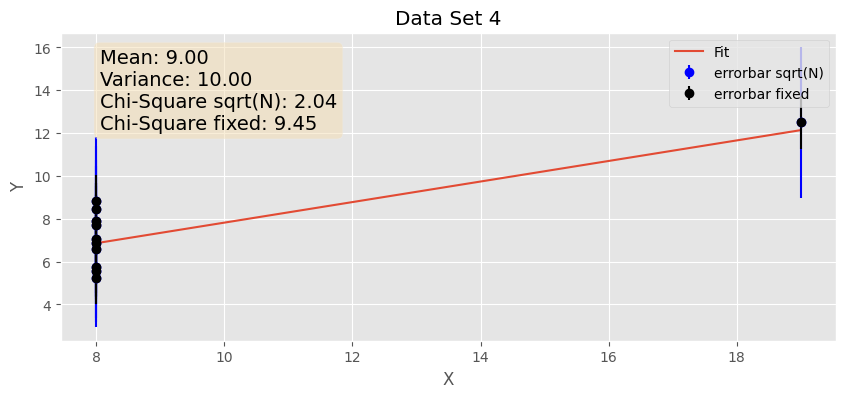

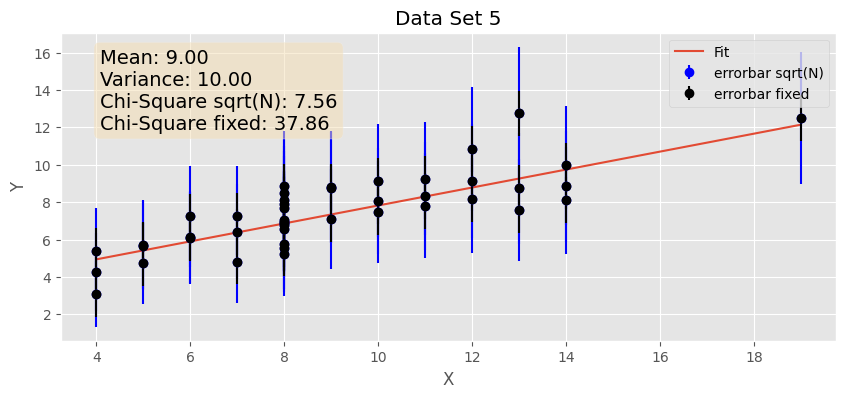

In [183]:
class Stat():
    def __init__(self, data, perform_all = True):
        self.data = data
        self.data_x = data[:,0]
        self.data_y = data[:,1]

        if perform_all:
            self.calc_basic()
            self.calc_chi()

    def calc_basic(self, display = False):
        self.mean = np.mean(self.data_x)
        self.std = np.std(self.data_x)
        self.std_mean = self.std/np.sqrt(len(data))

        if display:
            print(f"Mean: {self.mean}")
            print(f"Standard Deviation: {self.std}")
            print(f"Standard Deviation of the Mean: {self.std_mean}")

    def calc_chi(self, display = False):
        def func(x):
            return 0.48*x + 3.02
        
        # Calculate chi-squared using given sigma or assumed sqrt(N) uncertainty
        self.chi_sqrt = np.sum((self.data_y - func(self.data_x))**2/func(self.data_x))

        self.chi_fixed = np.sum((self.data_y - func(self.data_x))**2/1.22**2)

        if display:
            print(f"Chi Squared sqrt(N): {self.chi_sqrt}")
            print(f"Chi Squared fixed: {self.chi_fixed}")
    
    def show_fit(self, title = None):
        x = np.linspace(min(self.data_x), max(self.data_x), 100)
        y = 0.48*x + 3.02
        plt.figure(figsize=(10,4))
        plt.plot(x, y, label = "Fit")
        plt.errorbar(self.data_x, self.data_y, yerr = np.sqrt(self.data_y), fmt = 'o', color = "b", label = "errorbar sqrt(N)")
        plt.errorbar(self.data_x, self.data_y, yerr = 1.22, fmt = 'o', color = 'black', label = "errorbar fixed")
        plt.xlabel("X")
        plt.ylabel("Y")
        if title is not None:
            plt.title(title)
        else:
            plt.title("Data Set")
        plt.legend()
        
        # Display mean, variance, and chi-square in a box on the plot
        textstr = '\n'.join((
            f'Mean: {self.mean:.2f}',
            f'Variance: {self.std**2:.2f}',
            f'Chi-Square sqrt(N): {self.chi_sqrt:.2f}',
            f'Chi-Square fixed: {self.chi_fixed:.2f}'))
            
        
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        
        # place a text box in upper left in axes coords
        plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
                   verticalalignment='top', bbox=props)


        plt.show()

for x in range(len(data)):
    stat = Stat(data[x])
    stat.show_fit(title = f"Data Set {x+1}")